# Social Network Ads

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [2]:
data = pd.read_csv('../dataset/Social_Network_Ads.csv')

In [3]:
data.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
309,15652400,Female,38,50000,0
25,15631159,Male,47,20000,1
120,15811613,Female,36,75000,0
107,15789863,Male,27,89000,0
354,15699619,Male,36,99000,1


In [4]:
data.shape

(400, 5)

In [5]:
data.drop(['User ID'], axis=1, inplace=True)

In [6]:
data.sample(5)

,Gender,Age,EstimatedSalary,Purchased
236,Male,40,57000,0
397,Female,50,20000,1
137,Male,30,107000,1
342,Female,38,65000,0
34,Male,27,90000,0


In [7]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
data['EstimatedSalary'] = data['EstimatedSalary'] / 1000

In [9]:
data.sample(5)

,Gender,Age,EstimatedSalary,Purchased
87,Female,28,85.0,0
198,Male,26,80.0,0
82,Male,20,49.0,0
358,Male,40,71.0,1
89,Male,35,50.0,0


In [10]:
Counter(data['Gender'])

Counter({'Female': 204, 'Male': 196})

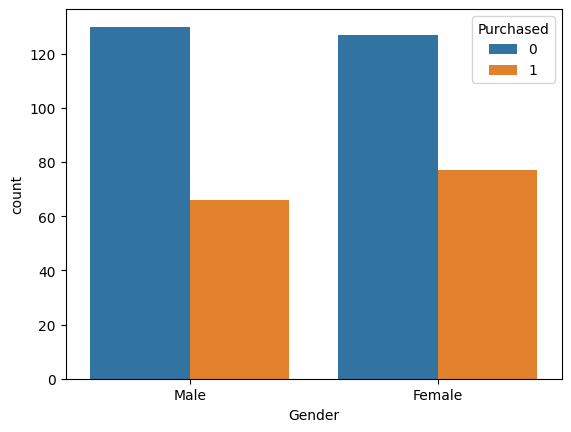

In [11]:
sns.countplot(x='Gender', data=data, hue='Purchased')
plt.show()

In [12]:
mapper = {'Female': 0, 'Male': 1}
data['Gender'] = data['Gender'].map(mapper)

In [13]:
# data.drop(['Gender'], axis=1, inplace=True)

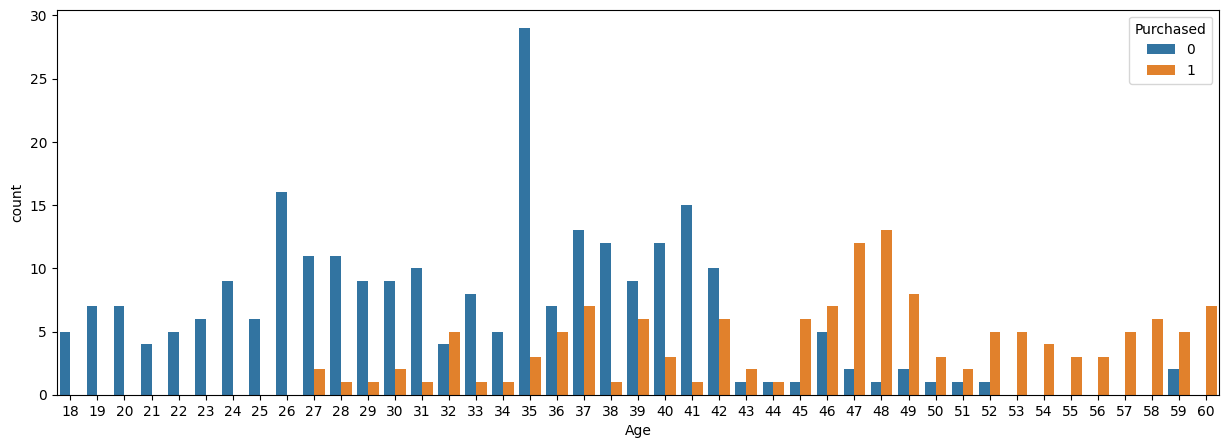

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Age', data=data, hue='Purchased')
plt.show()

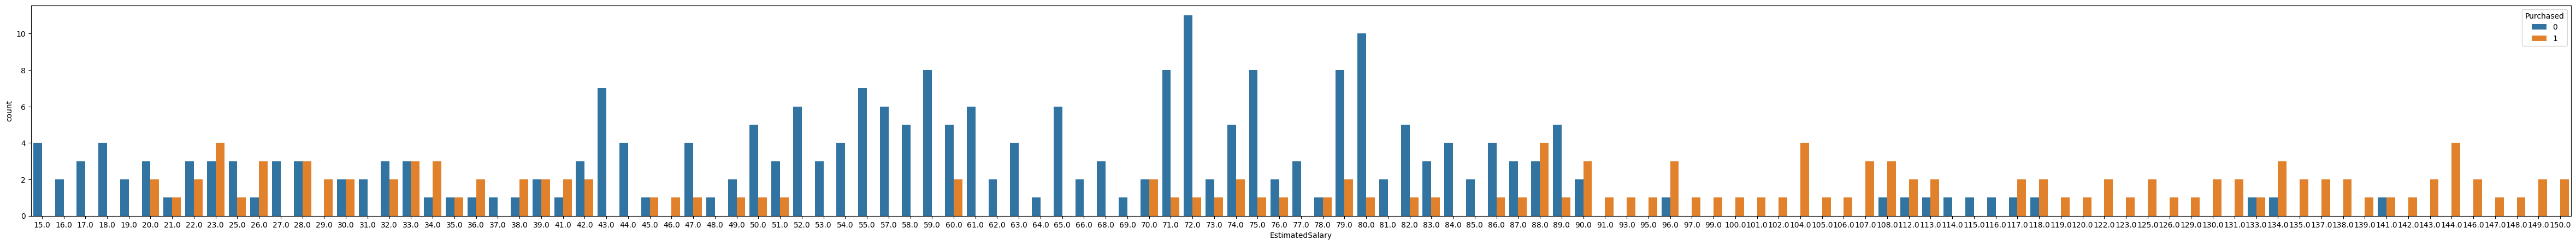

In [15]:
plt.figure(figsize=(60, 5))
sns.countplot(x='EstimatedSalary', data=data, hue='Purchased')
plt.show()

In [16]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19.0,0
1,1,35,20.0,0
2,0,26,43.0,0
3,0,27,57.0,0
4,1,19,76.0,0


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# SVM: Support Vector Machine
# SVC: Support Vector Classifier
# SVR: Support Vector Regressor

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
Counter(data['Purchased'])

Counter({0: 257, 1: 143})

In [20]:
data.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

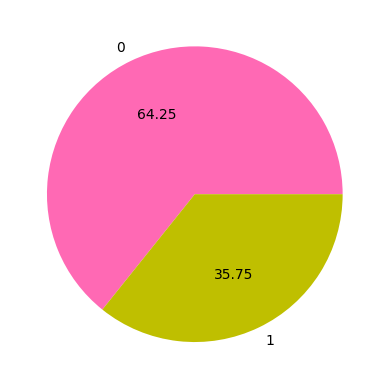

In [21]:
count = {0: 257, 1: 143}
plt.pie(x=count.values(),labels=count.keys() ,colors=['hotpink', 'y'], autopct='%.4g')
plt.show()

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
y = data['Purchased']
X = data.drop(['Purchased'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=666,
                                                    stratify=y)

In [25]:
smote = SMOTE()

In [26]:
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

In [27]:
Counter(y_balanced)

Counter({0: 218, 1: 218})

In [28]:
Counter(y_train)

Counter({0: 218, 1: 122})

In [29]:
svm = SVC()
dtree = DecisionTreeClassifier()
logistic = LogisticRegression(n_jobs=-1)

In [30]:
svm.fit(X_train, y_train)
dtree.fit(X_train, y_train)
logistic.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [31]:
from sklearn.metrics import classification_report

In [32]:
y_pred_svm = svm.predict(X_test)
y_pred_logistic = logistic.predict(X_test)
y_pred_dtree = dtree.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.94      0.81      0.87        21

    accuracy                           0.92        60
   macro avg       0.92      0.89      0.91        60
weighted avg       0.92      0.92      0.92        60



In [34]:
print(classification_report(y_test, y_pred_dtree))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88        39
           1       0.82      0.67      0.74        21

    accuracy                           0.83        60
   macro avg       0.83      0.79      0.81        60
weighted avg       0.83      0.83      0.83        60



In [35]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.89      0.76      0.82        21

    accuracy                           0.88        60
   macro avg       0.88      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60



In [36]:
svm = SVC()
dtree = DecisionTreeClassifier()
logistic = LogisticRegression(n_jobs=-1)

In [37]:
svm.fit(X_balanced, y_balanced)
dtree.fit(X_balanced, y_balanced)
logistic.fit(X_balanced, y_balanced)

LogisticRegression(n_jobs=-1)

In [38]:
y_pred_svm = svm.predict(X_test)
y_pred_logistic = logistic.predict(X_test)
y_pred_dtree = dtree.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.95      0.86      0.90        21

    accuracy                           0.93        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.93      0.93      0.93        60



In [40]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87        39
           1       0.71      0.95      0.82        21

    accuracy                           0.85        60
   macro avg       0.84      0.87      0.84        60
weighted avg       0.88      0.85      0.85        60



In [41]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.67      0.67      0.67        21

    accuracy                           0.77        60
   macro avg       0.74      0.74      0.74        60
weighted avg       0.77      0.77      0.77        60



In [ ]:
!pip install tensorflow
!pip install keras

In [42]:
!pip list

Package                   Version
------------------------- ---------
anyio                     3.7.1
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.2.1
async-lru                 2.0.3
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
blinker                   1.6.2
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
click                     8.1.6
colorama                  0.4.6
comm                      0.1.3
contourpy                 1.1.0
cycler                    0.11.0
debugpy                   1.6.7
decorator                 4.4.2
defusedxml                0.7.1
EasyProcess               1.1
entrypoint2               1.1
et-xmlfile                1.1.0
exceptiongroup            1.1.2
executing                 1.2.0
fastjsonschema            2